In [1]:
# Modelo de algoritmo de correção de erros adaptativo

import os 
import pandas as pd
import pickle
import re
from operator import itemgetter
import random
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt
%matplotlib inline

random.seed(0)

# Abrir arquivo de dados

a_file = open("data.pkl", "rb")
data = pickle.load(a_file)

# Parametros de configuração da simulação

modulacao = 'BPSK'

sinalRuido = []
for i in range(0, 100):
    sinalRuido.append(round(random.uniform(3, 12), 1))
# print('Vetor SNR:',sinalRuido, '\n\n')

codecRate = 64 # Kbps
codecPayload = 160  # Bytes
pps = 50 # milisegundos
cabecalhoIP = 40 # Bytes 
quantChamadas = 1
bandaDisponivel = 100 # Kbps


availableConfigs = []

results = []
bandwidth_results = []

for mod, param in data.items():
    if mod == modulacao:
        for snr in sinalRuido:
            if snr in param.keys():
                for tupla in param.get(snr):
                    rate = tupla[3]
                    if quantChamadas > 1:
                        bandaRequerida = ((((codecPayload * rate + cabecalhoIP) * 8) * pps) / 1000) * quantChamadas
                        if bandaRequerida <= bandaDisponivel:
                            availableConfigs.append(tupla)
                    else:
                        bandaRequerida = (((codecPayload * rate + cabecalhoIP) * 8) * pps) / 1000
                        if bandaRequerida <= bandaDisponivel:
                            availableConfigs.append(tupla)
                            
#                 print('A banda disponível é de:', bandaDisponivel, 'Kbps')

                tabela = pd.DataFrame(availableConfigs, columns =['MOS', 'BER', 'FEC', 'RATE']) 
#                 print('Configurações possiveis para modulação', mod, 'e SNR', snr, 'dB:' '\n')
#                 print(tabela, '\n')
                print(tabela)
                
                try:
                    value = sorted(sorted(availableConfigs, key=lambda element: element[3]), 
                                   key=lambda element: element[0], reverse=True)[0]

#   Salva resultados dos testes em lista

                    results.append(value)

#                     print('Melhor configuração: ', value[2])
#                     print('MOS=', value[0])
#                     print('---------------------------------------------------------', '\n')
                except:
                    print('Impossivel: Largura de banda insuficiente')

                list.clear(availableConfigs)

# Lista com valores MOS resultantes

mos_values = [i[0] for i in results]
bandwidth_results = []
for i in results:
    x = i[3]
    bandwidth_results.append(((((codecPayload * x + cabecalhoIP) * 8) * pps) / 1000) * quantChamadas)

# Fechar arquivo

a_file.close()

      MOS           BER           FEC      RATE
0  4.3394  8.056800e-07       No Code  1.000000
1  4.5000  0.000000e+00  RS(255, 247)  1.032389
2  4.5000  0.000000e+00  RS(255, 225)  1.133333
3  4.5000  0.000000e+00  RS(240, 200)  1.200000
4  4.5000  0.000000e+00  RS(255, 205)  1.243902
5  4.5000  0.000000e+00  RS(360, 280)  1.285714
      MOS       BER           FEC      RATE
0  3.9939  0.000006       No Code  1.000000
1  4.5000  0.000000  RS(255, 247)  1.032389
2  4.5000  0.000000  RS(255, 225)  1.133333
3  4.5000  0.000000  RS(240, 200)  1.200000
4  4.5000  0.000000  RS(255, 205)  1.243902
5  4.5000  0.000000  RS(360, 280)  1.285714
      MOS       BER           FEC      RATE
0  1.1915  0.000984       No Code  1.000000
1  2.1989  0.000154  RS(255, 247)  1.032389
2  4.5000  0.000000  RS(255, 225)  1.133333
3  4.5000  0.000000  RS(240, 200)  1.200000
4  4.5000  0.000000  RS(255, 205)  1.243902
5  4.5000  0.000000  RS(360, 280)  1.285714
      MOS       BER           FEC      RATE
0  1

5  0.90495  0.012938  RS(360, 280)  1.285714
      MOS       BER           FEC      RATE
0  2.4519  0.000082       No Code  1.000000
1  4.5000  0.000000  RS(255, 247)  1.032389
2  4.5000  0.000000  RS(255, 225)  1.133333
3  4.5000  0.000000  RS(240, 200)  1.200000
4  4.5000  0.000000  RS(255, 205)  1.243902
5  4.5000  0.000000  RS(360, 280)  1.285714
      MOS       BER           FEC      RATE
0  1.4513  0.000456       No Code  1.000000
1  3.9234  0.000008  RS(255, 247)  1.032389
2  4.5000  0.000000  RS(255, 225)  1.133333
3  4.5000  0.000000  RS(240, 200)  1.200000
4  4.5000  0.000000  RS(255, 205)  1.243902
5  4.5000  0.000000  RS(360, 280)  1.285714


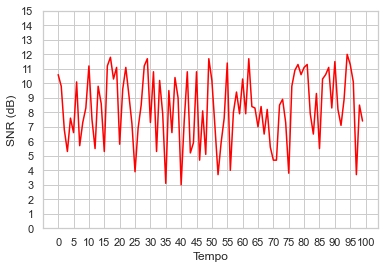

In [2]:
# Gráfico da variação SNR

sns.set(style="whitegrid")

# Paletas de cores utilizadas
# nipy_spectral_r, Set1, None

ax = sns.lineplot(y=sinalRuido, x=range(len(sinalRuido)), sort=True, palette=None, color='red')

# Define os limites dos eixos x e y

plt.ylim(0, 15)
# plt.xlim(22, 35)

# Configura ticks dos eixos x e y

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# Label eixo X e Y

ax.set_xlabel('Tempo', fontsize=12)
ax.set_ylabel('SNR (dB)', fontsize=12)

# Salvar gráfico

fig = ax.get_figure()
try:
    fig.savefig('snr_variation.svg', format='svg', dpi=1200)
except Exception as ex:
    print(ex)

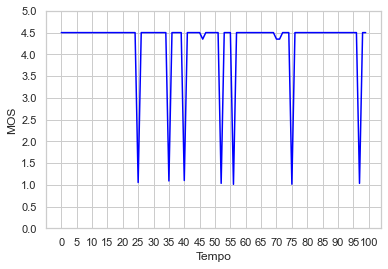

In [3]:
# Resultado do MOS do algoritmo adaptativo

ax = sns.lineplot(x=range(len(sinalRuido)), y=mos_values, sort=True, palette=None, color='blue')

# Define os limites dos eixos x e y

plt.ylim(0, 5)
# plt.xlim(22, 35)

# Configura ticks dos eixos x e y

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Label eixo X e Y

ax.set_xlabel('Tempo', fontsize=12)
ax.set_ylabel('MOS', fontsize=12)

# Salvar gráfico

fig1 = ax.get_figure()
try:
    fig.savefig('mos_adaptative.svg', format='svg', dpi=1200)
except Exception as ex:
    print(ex)

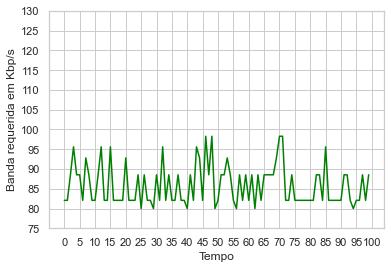

In [4]:
# Variação da banda necessária

ax = sns.lineplot(x=range(len(sinalRuido)), y=bandwidth_results, sort=True, palette=None, color='green')

# Define os limites dos eixos x e y

plt.ylim(75, 130)
# plt.xlim(22, 35)

# Configura ticks dos eixos x e y

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Label eixo X e Y

ax.set_xlabel('Tempo', fontsize=12)
ax.set_ylabel('Banda requerida em Kbp/s', fontsize=12)

# Salvar gráfico

fig = ax.get_figure()
try:
    fig.savefig('band_variation.svg', format='svg', dpi=1200)
except Exception as ex:
    print(ex)

In [5]:
# MOS médio

def Average(lst): 
    return sum(lst) / len(lst) 
  
# Printing average of the list 
print("Banda média requerida =", round(Average(bandwidth_results), 2), 'Kbp/s') 
print("MOS médio =", round(Average(mos_values), 2), 'e SNR médio de =', round(Average(sinalRuido), 2), 'dB') 

Banda média requerida = 85.86 Kbp/s
MOS médio = 4.25 e SNR médio de = 8.27 dB
